<a href="https://colab.research.google.com/github/aasharib/CV_Assignment_3/blob/main/CV_Assignment_3_alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:

!unzip -q /content/drive/MyDrive/Semester1/CV/Assignment/3/intel-image-classification.zip -d /content/assgn3

In [3]:
from sklearn.datasets import load_files
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
trainData = load_files('/content/assgn3/seg_train/seg_train',load_content=False)
testData = load_files('/content/assgn3/seg_test/seg_test',load_content=False)
#validationData = load_files('/content/assgn3/seg_pred/seg_pred',load_content=False)

In [5]:
trainData

{'DESCR': None,
 'filenames': array(['/content/assgn3/seg_train/seg_train/glacier/6416.jpg',
        '/content/assgn3/seg_train/seg_train/buildings/5658.jpg',
        '/content/assgn3/seg_train/seg_train/street/7656.jpg', ...,
        '/content/assgn3/seg_train/seg_train/sea/13907.jpg',
        '/content/assgn3/seg_train/seg_train/sea/3467.jpg',
        '/content/assgn3/seg_train/seg_train/forest/14133.jpg'],
       dtype='<U55'),
 'target': array([2, 0, 5, ..., 4, 4, 1]),
 'target_names': ['buildings',
  'forest',
  'glacier',
  'mountain',
  'sea',
  'street']}

In [6]:
trainDataLabel = trainData.target

In [7]:
def readAndPreprocessImage(imgFile):
    curImg = np.asarray(Image.open(imgFile).resize((150,150)))
    if curImg is not None:
        #print("Done", imgFile)
        return curImg 

In [8]:
trainDataImgArr = np.array(list(map(readAndPreprocessImage, trainData.filenames)))

In [9]:
(trainingDataImgX, validationDataImgX, trainingDataLabelY, validationDataLabelY) = train_test_split(trainDataImgArr, trainDataLabel, test_size=0.2, random_state=42)

2
3


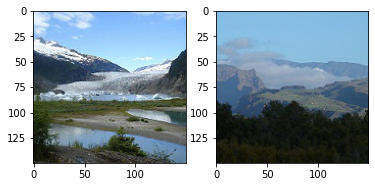

In [10]:

fig, ax = plt.subplots(1,2,figsize=(6,6))
ax[0].imshow(trainingDataImgX[0])
ax[1].imshow(trainingDataImgX[1])
print(trainingDataLabelY[0])
print(trainingDataLabelY[1])

In [11]:
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential

# vgg16 = Sequential()
# vgg16.add(Conv2D(64, kernel_size=3, padding='same', activation='relu',
#                  input_shape=(150, 150, 3)))
# vgg16.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))
# vgg16.add(MaxPooling2D(pool_size=2, strides=2))
# vgg16.add(Dropout(0.25))

# vgg16.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
# vgg16.add(Conv2D(128, kernel_size=3, padding='same', activation='relu'))
# vgg16.add(MaxPooling2D(pool_size=2, strides=2))
# vgg16.add(Dropout(0.25))

# vgg16.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
# vgg16.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
# vgg16.add(Conv2D(256, kernel_size=3, padding='same', activation='relu'))
# vgg16.add(MaxPooling2D(pool_size=2, strides=2))
# vgg16.add(Dropout(0.25))

# vgg16.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
# vgg16.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
# vgg16.add(Conv2D(512, kernel_size=3, padding='same', activation='relu'))
# vgg16.add(MaxPooling2D(pool_size=2, strides=2))
# vgg16.add(Dropout(0.25))

# vgg16.add(Conv2D(512, kernel_size=3, activation='relu'))
# vgg16.add(Conv2D(512, kernel_size=3, activation='relu'))
# vgg16.add(Conv2D(512, kernel_size=3, activation='relu'))
# vgg16.add(MaxPooling2D(pool_size=2, strides=2))
# vgg16.add(Dropout(0.25))

# vgg16.add(Flatten())

# vgg16.add(Dense(4096, activation='relu'))
# vgg16.add(Dense(4096, activation='relu'))
# vgg16.add(Dense(4096, activation='relu'))

# # the data we are using has 6 classes
# vgg16.add(Dense(6, activation='softmax'))

In [12]:
vgg16 = Sequential()
# add 96 convolution filters of size 11x11 with stride 4
vgg16.add(Conv2D(96, (11, 11), strides=(4,4), padding='same', activation='relu', input_shape=(150, 150, 3)))
vgg16.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

vgg16.add(Conv2D(256, (5,5), padding='same', activation='relu'))
vgg16.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

vgg16.add(Conv2D(384, (3,3), padding='same', activation='relu'))
vgg16.add(Conv2D(384, (3,3), padding='same', activation='relu'))
vgg16.add(Conv2D(384, (3,3), padding='same', activation='relu'))
vgg16.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

# flatten the input feature map. here it flattens the last feature map before it
vgg16.add(Flatten())

# add FC layers. Using less no. of neurons here
vgg16.add(Dense(384, activation='relu'))
vgg16.add(Dense(384, activation='relu'))

# add FC layer with 10 units for we have 10 classes
# use softmax activation for classification
vgg16.add(Dense(6, activation='softmax'))

In [13]:
#vgg16.summary()

In [14]:
from keras.optimizers import SGD
sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
vgg16.compile(loss='categorical_crossentropy', 
              optimizer=sgd,
              metrics=['accuracy'])

In [15]:
trainingDataLabelY[0]

2

In [16]:
from keras.utils import to_categorical
trainingDataLabelOHE = to_categorical(trainingDataLabelY)
validationDataLabelOHE = to_categorical(validationDataLabelY)

In [17]:
trainingDataLabelOHE[0]

array([0., 0., 1., 0., 0., 0.], dtype=float32)

In [18]:
H = vgg16.fit(trainingDataImgX, trainingDataLabelOHE, batch_size=128, epochs=50, validation_data=(validationDataImgX, validationDataLabelOHE))

Epoch 1/50
88/88 [==============================] - 15s 79ms/step - loss: 7.9943 - accuracy: 0.1749 - val_loss: 1.7712 - val_accuracy: 0.1952
Epoch 2/50
88/88 [==============================] - 6s 67ms/step - loss: 1.7171 - accuracy: 0.2366 - val_loss: 1.6376 - val_accuracy: 0.2889
Epoch 3/50
88/88 [==============================] - 6s 68ms/step - loss: 1.6484 - accuracy: 0.2969 - val_loss: 1.5169 - val_accuracy: 0.4225
Epoch 4/50
88/88 [==============================] - 6s 69ms/step - loss: 1.5013 - accuracy: 0.4088 - val_loss: 1.2686 - val_accuracy: 0.4767
Epoch 5/50
88/88 [==============================] - 6s 69ms/step - loss: 1.2497 - accuracy: 0.4981 - val_loss: 1.0766 - val_accuracy: 0.5582
Epoch 6/50
88/88 [==============================] - 6s 70ms/step - loss: 1.0885 - accuracy: 0.5516 - val_loss: 1.0412 - val_accuracy: 0.5875
Epoch 7/50
88/88 [==============================] - 6s 70ms/step - loss: 0.9764 - accuracy: 0.6104 - val_loss: 0.9577 - val_accuracy: 0.6142
Epoch 8/50
8

In [25]:
# save the model's trained weights
vgg16.save_weights('alexnet_trained_50epochs_94_accuracy.h5')

In [20]:
!cp /content/vgg16_trained_normal_vgg.h5 /content/drive/MyDrive/Semester1/CV/Assignment/3

cp: cannot stat '/content/vgg16_trained_normal_vgg.h5': No such file or directory


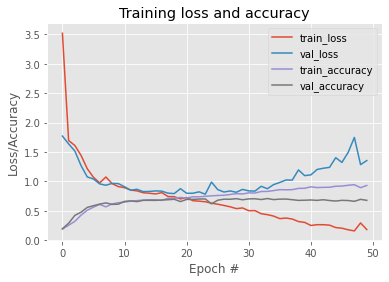

In [21]:
import matplotlib.pyplot as plt
N = np.arange(0, 50)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, H.history['loss'], label='train_loss')
plt.plot(N, H.history['val_loss'], label='val_loss')
plt.plot(N, H.history['accuracy'], label='train_accuracy')
plt.plot(N, H.history['val_accuracy'], label='val_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [22]:
testDataImgArr = np.array(list(map(readAndPreprocessImage, testData.filenames)))
testDataLabel = testData.target
testDataLabelOHE = to_categorical(testDataLabel)

In [23]:
'''CONFUSION MATRIX'''
# Making prediction
predicatedTestDataY = vgg16.predict_classes(testDataImgArr)
actualTestDataY = np.argmax(testDataLabelOHE, axis=-1)

# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(actualTestDataY, predicatedTestDataY)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [24]:
print(confusionMatrix)

[[324  17  17  13  15  51]
 [ 37 365   3   3   3  63]
 [ 35   3 344  76  83  12]
 [ 35   1  80 295 106   8]
 [ 38   6  98  78 284   6]
 [117  23  10   4  11 336]]
